# Importación de librerias y carga de la base de datos a usar

In [1]:
#Importando las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
import BayesLib as bl

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *

In [2]:
#abriendo el conjunto de datos desde un archivo CSV y asignandolo los datos al DataFrame "df"
df = pd.read_csv('dataset_a.csv', sep=';', error_bad_lines=False)

# Análisis de datos 1D

En el análisis 1D se realiza una primera aproximación de los datos, se realiza el estudio de las siguientes preguntas:

1. ¿Cuál es la dimensión de la base de datos utilizada?
2. ¿Contiene valores nulos "NaN" que deban ser tratados?
3. ¿Cuál es la caracteristica de cada variable (columna) de la base de datos?
4. ¿Existen variables que no son un aporte al análisis?
5. ¿Cúal es el analisis descriptivo de los datos?
6. ¿Existen variables categoricas que se deban transformar numéricamente?

In [3]:
#identificando el número de filas y columnas que contiene el DataFrame "df"
print(df.shape)

(467, 80)


In [4]:
#identificando las columnas con valores nulos "NaN"
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [5]:
#identificando las caracteristicas del dataset a nivel de tipos de datos y que columnas tienen valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rut         467 non-null    int64  
 1   usuario     467 non-null    object 
 2   correo      467 non-null    object 
 3   nombre      467 non-null    object 
 4   profesor    467 non-null    object 
 5   i1          467 non-null    float64
 6   f1          467 non-null    float64
 7   t1          467 non-null    float64
 8   r1          467 non-null    int64  
 9   p1          467 non-null    int64  
 10  s1          467 non-null    object 
 11  l1          467 non-null    int64  
 12  i2          467 non-null    float64
 13  f2          467 non-null    float64
 14  t2          467 non-null    float64
 15  r2          467 non-null    int64  
 16  p2          467 non-null    int64  
 17  s2          467 non-null    object 
 18  l2          467 non-null    int64  
 19  i3          467 non-null    f

In [6]:
%%capture
#Eliminando variables que no aportan al análisis
df = df.drop([
    'rut', 'usuario', 'correo', 'nombre', 'profesor', 
    'i1', 'f1', 's1', 
    'i2', 'f2', 's2',
    'i3', 'f3', 's3', 
    'i4', 'f4', 's4', 
    'i5', 'f5', 's5', 
    'i6', 'f6', 's6',
    'sol1', 'sol2', 'sol3', 'sol4',
    'tarea1', 'tarea2',
    'controles', 'np', 'examen'], axis=1)

In [7]:
#Analisis descriptivo de los datos
df.describe()

,t1,r1,p1,l1,t2,r2,p2,l2,t3,r3,...,lt,tt,pt,game_score,score,score_a,score_p,score_d,score_s,final
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,101.104817,2.179872,12.370450,8.856531,90.699059,1.897216,10.758030,11.417559,169.270350,2.199143,...,78.284797,580.860696,68.402570,18.531029,7.077088,4.404711,3.199143,2.197002,2.222698,5.331049
std,110.090207,2.675148,20.590161,3.801227,92.952985,1.899326,11.804347,3.201923,117.380853,1.826415,...,18.204084,286.479239,51.589755,6.872696,2.156547,1.546497,1.323670,1.033636,0.875071,1.287560
min,14.947463,0.000000,1.000000,7.000000,17.714780,1.000000,2.000000,10.000000,27.226233,1.000000,...,61.000000,177.997170,11.000000,9.682934,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,41.700748,1.000000,2.000000,7.000000,46.058281,1.000000,5.000000,10.000000,88.981408,1.000000,...,66.000000,384.790510,37.000000,13.995174,6.000000,3.000000,2.000000,1.000000,2.000000,4.900000
50%,65.350279,1.000000,7.000000,7.000000,67.506870,1.000000,9.000000,10.000000,131.983587,1.000000,...,73.000000,509.651843,55.000000,17.100026,7.000000,4.000000,3.000000,2.000000,2.000000,5.600000
75%,116.476445,2.000000,12.500000,9.000000,104.718704,2.000000,12.000000,12.000000,214.802128,3.000000,...,85.000000,700.930958,83.500000,20.946877,9.000000,5.500000,4.000000,3.000000,3.000000,6.200000
max,962.077675,26.000000,214.000000,44.000000,1092.332500,24.000000,124.000000,29.000000,1080.815802,14.000000,...,191.000000,2262.968067,623.000000,84.472331,12.000000,8.000000,5.000000,4.000000,4.000000,7.000000


Estadísticas sobre variables NO numéricas para su posterior reemplazo por valores continuos

In [8]:
#Estadísticas de la variable "programa"
serie = df['programa2'].value_counts(normalize=True, ascending=True)*100
print(serie)

#Transformación numérica de la variable "programa"
for i in range(len(serie)):
    df["programa2"] = df["programa2"].str.replace(serie.index[i], str(i+1))
  
serie = df['programa2'].value_counts(normalize=True, ascending=True)*100
print(serie)

df['programa2'] = df['programa2'].astype('int')

BACHILLERATO EN CIENCIAS                    0.428266
INGENIERIA INDUSTRIAL                       6.638116
INGENIERIA CIVIL INFORMATICA               23.340471
INGENIERIA EN COMPUTACION E INFORMATICA    29.336188
INGENIERIA CIVIL INDUSTRIAL                40.256959
Name: programa2, dtype: float64
1     0.428266
2     6.638116
3    23.340471
4    29.336188
5    40.256959
Name: programa2, dtype: float64


In [9]:
#Estadísticas de la variable "estado"
serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

#Transformacíon numérica de la variable "estado"
for i in range(len(serie)):
    df["estado"] = df["estado"].str.replace(serie.index[i], str(i))

serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

df['estado'] = df['estado'].astype('int')

A    89.507495
R    10.492505
Name: estado, dtype: float64
0    89.507495
1    10.492505
Name: estado, dtype: float64


In [10]:
#identificando las nuevas caracteristicas del dataset a nivel de tipos de datos y que columnas tienen valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t1          467 non-null    float64
 1   r1          467 non-null    int64  
 2   p1          467 non-null    int64  
 3   l1          467 non-null    int64  
 4   t2          467 non-null    float64
 5   r2          467 non-null    int64  
 6   p2          467 non-null    int64  
 7   l2          467 non-null    int64  
 8   t3          467 non-null    float64
 9   r3          467 non-null    int64  
 10  p3          467 non-null    int64  
 11  l3          467 non-null    int64  
 12  t4          467 non-null    float64
 13  r4          467 non-null    int64  
 14  p4          467 non-null    int64  
 15  l4          467 non-null    int64  
 16  t5          467 non-null    float64
 17  r5          467 non-null    int64  
 18  p5          467 non-null    int64  
 19  l5          467 non-null    i

# Análisis 2D

En el análisis 2D se realiza un estudio más profundo respecto a la relación entre las variables.  Se analiza lo siguiente:

1. Se crean los histogramas utilizando todas las variables para visualizar cuales de ellas tienen una correlación positiva.
2. Se seleccionan aquellas variables con una mayor correlación positiva. Tarea manual y de observación.
3. se acota el histograma con las variables mayormente correlacionadas.
4. Se identifican las variables categóricas y se seleccionan. Tarea manual y de observación.
5. Se realizan tablas de contingencia para registrar y analizar la asociación entre dos o más variables.

In [11]:
#obtener el plot completo de todas las variables
#sns.pairplot(df);

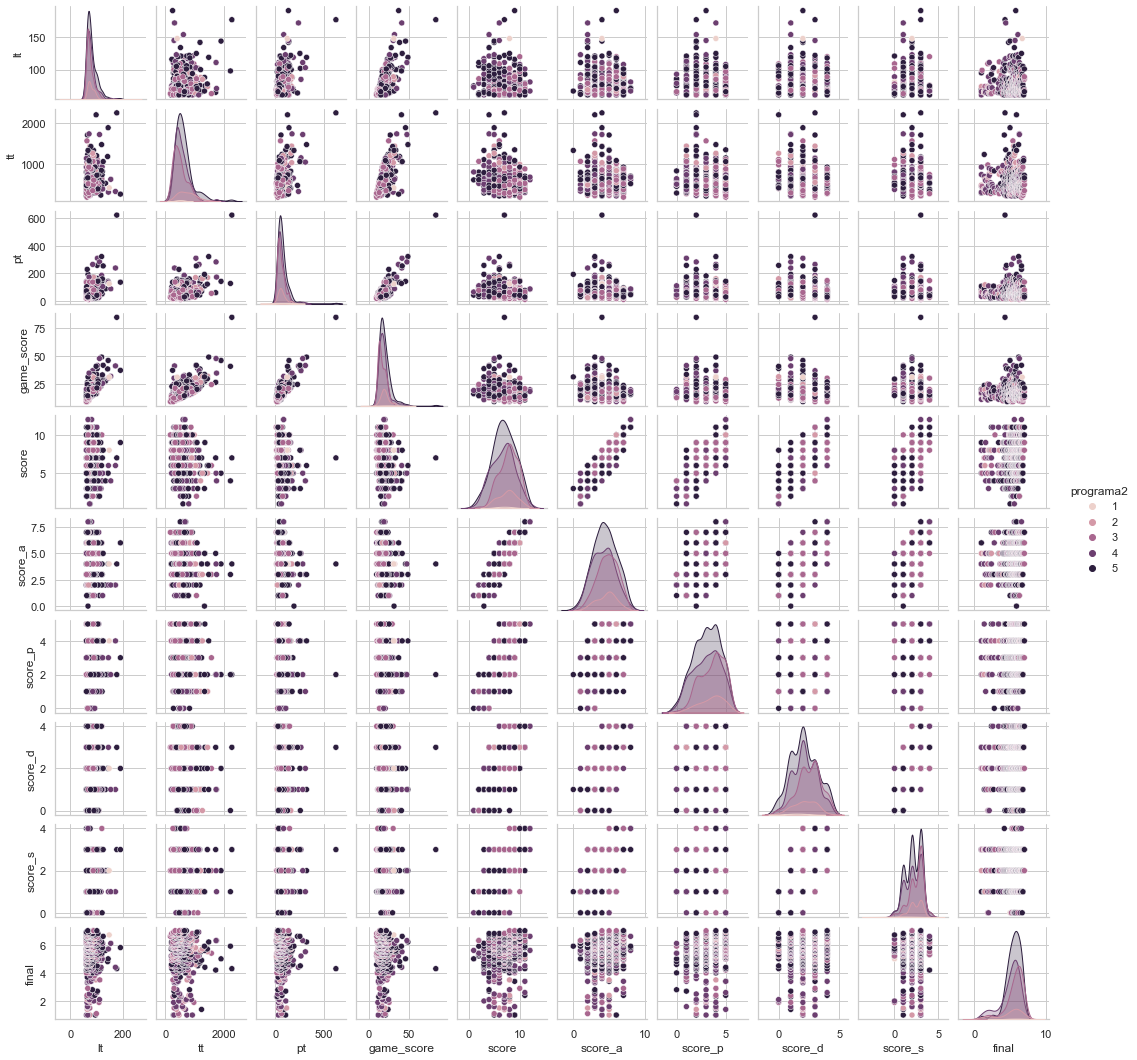

In [12]:
#realizando el plot de las variables identificadas como más correlacionadas.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, 
             x_vars=['lt','tt','pt','game_score','score','score_a','score_p','score_d','score_s','final'],
             y_vars=['lt','tt','pt','game_score','score','score_a','score_p','score_d','score_s','final'],
             height=1.5, hue='programa2');
plt.show()

Obteniendo tablas de contingencia de las variables categóricas para analizar comportamientos

In [13]:
#Se obtiene la tabla de contingencia de "programa" vs "estado" obteniendo la normalización 
#de los datos respecto a todos los programas
pd.crosstab(df.programa2, df.estado, normalize='all', margins=True)\
    .round(4)*100

estado,0,1,All
programa2,,,
1,0.43,0.00,0.43
2,5.14,1.50,6.64
3,21.20,2.14,23.34
4,24.41,4.93,29.34
5,38.33,1.93,40.26
All,89.51,10.49,100.00


In [14]:
#Se obtiene la tabla de contingencia de "op1" vs "sv1" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op1, df.sv1, normalize='all', margins=True)\
    .round(4)*100

sv1,0,1,All
op1,,,
0,2.14,42.18,44.33
1,0.00,55.67,55.67
All,2.14,97.86,100.00


In [15]:
#Se obtiene la tabla de contingencia de "op2" vs "sv2" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op2, df.sv2, normalize='all', margins=True)\
    .round(4)*100

sv2,0,1,All
op2,,,
0,5.78,24.41,30.19
1,0.00,69.81,69.81
All,5.78,94.22,100.00


In [16]:
#Se obtiene la tabla de contingencia de "op3" vs "sv3" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op3, df.sv3, normalize='all', margins=True)\
    .round(4)*100

sv3,0,1,All
op3,,,
0,60.17,0.00,60.17
1,0.00,39.83,39.83
All,60.17,39.83,100.00


In [17]:
#Se obtiene la tabla de contingencia de "op4" vs "sv4" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op4, df.sv4, normalize='all', margins=True)\
    .round(4)*100

sv4,0,1,All
op4,,,
0,23.98,28.69,52.68
1,0.00,47.32,47.32
All,23.98,76.02,100.00


In [18]:
#Se obtiene la tabla de contingencia de "op5" vs "sv5" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op5, df.sv5, normalize='all', margins=True)\
    .round(4)*100

sv5,0,1,All
op5,,,
0,12.63,46.25,58.89
1,0.00,41.11,41.11
All,12.63,87.37,100.00


In [19]:
#Se obtiene la tabla de contingencia de "op6" vs "sv6" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op6, df.sv6, normalize='all', margins=True)\
    .round(4)*100

sv6,0,1,All
op6,,,
0,20.34,31.69,52.03
1,0.00,47.97,47.97
All,20.34,79.66,100.00


# Construcción del Modelo

1. Se hace la selección de las variables relevantes en función del análisis 1D y 2D
2. Se preparan los datos realizando la discretización de los datos continuos.
3. Aplicar la estratificación en K iteraciones para dividir los datos en conjuntos de prueba y entrenamiento
4. Con los datos estratificados se realiza el entrenamiento utlizando redes bayesianas.

Seleccionando el conjunto de variables relevantes para el modelo

In [20]:
df = df.loc[:, ['lt', 'tt', 'pt', 'game_score', 
                'op1','op2', 'op3', 'op4', 'op5', 'op6',
                'sv1','sv2','sv3','sv4','sv5','sv6',
                'score', 'score_a', 'score_p', 'score_d', 'score_s',
                'programa2', 'final', 'estado']]

df.head()

,lt,tt,pt,game_score,op1,op2,op3,op4,op5,op6,...,sv5,sv6,score,score_a,score_p,score_d,score_s,programa2,final,estado
0,69,737.567575,61,18.109990,0,1,1,1,1,1,...,1,1,9,6,4,3,3,4,1.0,1
1,70,454.022769,81,16.759012,1,0,1,1,0,0,...,1,1,5,4,2,2,1,5,1.0,1
2,74,473.478219,66,16.664990,1,1,0,1,0,1,...,1,1,8,5,4,2,2,2,1.0,1
3,95,281.679075,107,20.672782,1,0,0,1,0,0,...,1,1,9,6,4,3,3,5,1.0,1
4,61,923.280446,43,17.524196,1,1,1,1,1,1,...,1,1,6,4,3,2,3,4,1.0,1


Realizando la discretización de las variables seleccionadas

In [21]:
binsNotas = 7
binsOtros = 5

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['lt']])
df[['lt']] = valor_discreto

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['tt']])
df[['tt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['pt']])
df[['pt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['game_score']])
df[['game_score']] = valor_discreto

nota_final =  KBinsDiscretizer(n_bins=binsNotas, encode='ordinal', strategy = "kmeans").fit_transform(df[['final']])
df[['final']] = valor_discreto

df.head()

,lt,tt,pt,game_score,op1,op2,op3,op4,op5,op6,...,sv5,sv6,score,score_a,score_p,score_d,score_s,programa2,final,estado
0,0.0,2.0,2.0,2.0,0,1,1,1,1,1,...,1,1,9,6,4,3,3,4,2.0,1
1,0.0,1.0,1.0,1.0,1,0,1,1,0,0,...,1,1,5,4,2,2,1,5,1.0,1
2,0.0,1.0,1.0,1.0,1,1,0,1,0,1,...,1,1,8,5,4,2,2,2,1.0,1
3,1.0,0.0,0.0,0.0,1,0,0,1,0,0,...,1,1,9,6,4,3,3,5,0.0,1
4,0.0,2.0,2.0,2.0,1,1,1,1,1,1,...,1,1,6,4,3,2,3,4,2.0,1


In [22]:
#indica cual va a ser el muestreo estratificado usando la clase "estado"
#cada fold mantiene la proporcion orignal de clases
#n_splits = el numero de experimentos a realizar
skf = StratifiedKFold(n_splits=5) #ejecutar con random state
target = df.loc[:, 'estado'] #todas las filas de la columna "estado"

fold_no = 1
for train_index, test_index in skf.split(df, target):
    #entrenando la porción de datos que proporcionó el muestreo estratificado
    train = df.loc[train_index,:] #todas las columnas de la fila "train_index"
    
    #aprendiendo la estructura y los parametros de la porción de datos entrenados
    estructura = bn.structure_learning.fit(train)
    modelo = bn.parameter_learning.fit(estructura, train)
    
    #muestra como queda la red bayesiana con la porción de los datos entrenados y los parametros aprendidos
    #G = bn.plot(modelo)
        
    #entrega la porción de datos que serán usados como test para realizar la inferencia usando propabilidad conjunta
    test = df.loc[test_index,:] #todas las columnas de la fila "test_index"
    print(test)
    
    #realizando la inferencia de los datos de prueba
    valor = bl.probabilidadConjunta(modelo, test)
    print(valor)
    
    i = 0 #columna que queremos obtener
    lista_test = [fila[i] for fila in valor]

    print('largo de train: ', len(train))
    print('largo de test : ', len(test))
    print('largo de proba: ', len(lista_test))
    
    print('Fold', str(fold_no), 'Precisión  :', accuracy_score(lista_test, test.loc[:, 'estado']))  
    print('Fold', str(fold_no), 'Precisión balanceada  :', balanced_accuracy_score(lista_test, test.loc[:, 'estado']))  
    
    print('Fold', str(fold_no), 'Class Ratio:',sum(test['estado'])/len(test['estado']))
    fold_no += 1

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+---------------------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(0)              | sv1(1)              | sv1(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(1)              | sv2(0)              | sv2(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(0.0) | 0.1984126984126984  | 0.1968503937007874  | 0.19101123595505617 | 0.45166666666666666 |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(1.0) | 0.1984126984126984  | 0.20866141732283464 | 0.21722846441947566 | 0.2366666666666666

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa2":5, "final":1.0}]
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa2":2, "final":1.0}]
FILA N°: 3 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa2":5, "final":0.0}]



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


FILA N°: 4 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa2":4, "final":2.0}]
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa2":4, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

FILA N°: 6 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa2":3, "final":1.0}]
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa2":5, "final":3.0}]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa2":4, "final":2.0}]
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa2":2, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa2":4, "final":0.0}]
FILA N°: 50 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa2":2, "final":2.0}]



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa2":5, "final":0.0}]
FILA N°: 52 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa2":5, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 53 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa2":5, "final":2.0}]
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa2":5, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa2":3, "final":0.0}]


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa2":3, "final":0.0}]
FILA N°: 57 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa2":4, "final":2.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


FILA N°: 58 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa2":4, "final":0.0}]
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa2":5, "final":1.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


FILA N°: 60 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa2":5, "final":0.0}]
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa2":4, "final":1.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


FILA N°: 62 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa2":3, "final":2.0}]
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa2":4, "final":1.0}]
FILA N°: 64 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa2":4, "final":1.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa2":5, "final":4.0}]
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa2":5, "final":0.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 67 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa2":5, "final":4.0}]
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa2":4, "final":0.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


FILA N°: 69 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa2":5, "final":1.0}]
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa2":5, "final":0.0}]
FILA N°: 71 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa2":5, "final":1.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 72 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa2":5, "final":0.0}]
FILA N°: 73 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa2":4, "final":1.0}]





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 74 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa2":4, "final":0.0}]
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa2":5, "final":1.0}]





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]




FILA N°: 76 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa2":4, "final":2.0}]
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa2":4, "final":0.0}]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


FILA N°: 78 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa2":5, "final":3.0}]
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa2":4, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa2":4, "final":1.0}]
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa2":5, "final":2.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 82 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa2":5, "final":3.0}]
FILA N°: 83 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa2":3, "final":0.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 84 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa2":4, "final":0.0}]
FILA N°: 85 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa2":5, "final":1.0}]
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa2":3, "final":0.0}]





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa2":4, "final":0.0}]
FILA N°: 88 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa2":2, "final":3.0}]





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 89 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa2":4, "final":2.0}]
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa2":5, "final":1.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa2":4, "final":2.0}]
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa2":5, "final":2.0}]
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa2":4, "final":1.0}]





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa2":4, "final":0.0}]
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa2":5, "final":0.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa2":5, "final":2.0}]
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa2":5, "final":1.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa2":5, "final":2.0}]
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa2":5, "final":2.0}]
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa2":5, "final":3.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

FILA N°: 101 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa2":3, "final":2.0}]
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa2":5, "final":1.0}]
FILA N°: 103 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa2":5, "final":1.0}]



Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:45, ?it/s]

FILA N°: 104 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa2":4, "final":2.0}]
FILA N°: 105 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa2":5, "final":0.0}]



Finding Elimination Order: : : 0it [01:45, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 106 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa2":5, "final":1.0}]
FILA N°: 107 -> P("Estado" | [{"lt":3.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa2":5, "final":3.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 108 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa2":3, "final":0.0}]
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa2":3, "final":2.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 110 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa2":5, "final":0.0}]
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa2":3, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa2":5, "final":3.0}]
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa2":4, "final":0.0}]
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa2":4, "final":0.0}]



Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




FILA N°: 115 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa2":3, "final":1.0}]
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa2":5, "final":1.0}]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 117 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa2":4, "final":1.0}]
FILA N°: 118 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa2":5, "final":3.0}]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 119 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa2":4, "final":2.0}]
FILA N°: 120 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa2":5, "final":2.0}]




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 121 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa2":5, "final":4.0}]
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa2":4, "final":0.0}]






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 123 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa2":5, "final":0.0}]
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa2":4, "final":0.0}]





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 125 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa2":1, "final":1.0}]
FILA N°: 126 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa2":4, "final":2.0}]





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 127 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa2":4, "final":2.0}]
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa2":5, "final":1.0}]





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


FILA N°: 129 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa2":5, "final":1.0}]
FILA N°: 130 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa2":3, "final":2.0}]
FILA N°: 131 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa2":5, "final":0.0}]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


FILA N°: 132 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa2":5, "final":1.0}]
[[0, 0.6098360655737705], [0, 0.6909620991253644], [0, 0.5374449339207049], [0, 0.6909620991253644], [0, 0.6098360655737705], [0, 0.6098360655737705], [0, 0.6329966329966329], [0, 0.6909620991253644], [0, 0.6098360655737705], [0, 0.5374449339207049], [0, 0.6098360655737705], [0, 0.5374449339207049], [0, 0.6909620991253644], [0, 0.6909620991253644], [0, 0.6909620991253644], [0, 0.6909620991253644], [0, 0.6329966329966329], [0, 0.6329966329966329], [0, 0.6098360655737705], [0, 0.6098360655737705], [0, 0.6909620991253644], [0, 0.6909620991253644], [0, 0.6098360655737705], [0, 0.6329966329966329], [0, 0.6098360655737705], [0, 0.6098360655737705], [0, 0.6909620991253644], [0, 0.6909620991253644], [0, 0.69096209912536

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:26, ?it/s]
Finding Elimination Order: : : 0it [00:26, ?it/s]
Finding Elimination Order: : : 0it [00:25, ?it/s]


[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+--------------------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(0)             | sv1(1)              | sv1(1)              |
+---------+---------------------+--------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(1)             | sv2(0)              | sv2(1)              |
+---------+---------------------+--------------------+---------------------+---------------------+
| lt(0.0) | 0.19607843137254902 | 0.1968503937007874 | 0.18888888888888888 | 0.4562289562289562  |
+---------+---------------------+--------------------+---------------------+---------------------+
| lt(1.0) | 0.19607843137254902 | 0.2047244094488189 | 0.21851851851851853 | 0.234006734006734   |
+---------+---------------------+--------------------+---------------------+------

KeyError: 'programa2'